### Functional API
The Keras functional API is a way to create models that are more flexible than the tf.keras.Sequential API.   
The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pprint import pprint

In [2]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
train_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,61,1,4,138,166,0,2,125,1,3.6,2,1,normal,1
1,58,1,2,120,284,0,2,160,0,1.8,2,0,normal,0
2,57,1,4,110,201,0,0,126,1,1.5,2,0,fixed,0
3,46,0,4,138,243,0,2,152,1,0.0,2,0,normal,0
4,44,1,4,120,169,0,0,144,1,2.8,3,0,fixed,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,53,0,4,130,264,0,2,143,0,0.4,2,0,normal,0
236,54,1,4,122,286,0,2,116,1,3.2,2,2,normal,1
237,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
238,44,1,3,140,235,0,2,180,0,0.0,1,0,normal,0


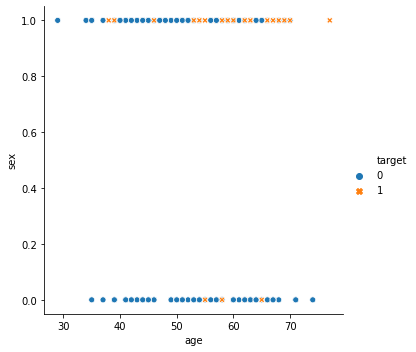

In [3]:
sns.relplot(x = 'age', y = 'sex', hue = 'target',style = 'target', data = train_df)

In [4]:
labelencoder = LabelEncoder()
train_df['thal'] = labelencoder.fit_transform(train_df['thal'])
test_df['thal'] = labelencoder.transform(test_df['thal'])
train_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,61,1,4,138,166,0,2,125,1,3.6,2,1,1,1
1,58,1,2,120,284,0,2,160,0,1.8,2,0,1,0
2,57,1,4,110,201,0,0,126,1,1.5,2,0,0,0
3,46,0,4,138,243,0,2,152,1,0.0,2,0,1,0
4,44,1,4,120,169,0,0,144,1,2.8,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,53,0,4,130,264,0,2,143,0,0.4,2,0,1,0
236,54,1,4,122,286,0,2,116,1,3.2,2,2,1,1
237,67,1,4,160,286,0,2,108,1,1.5,2,3,1,1
238,44,1,3,140,235,0,2,180,0,0.0,1,0,1,0


In [5]:
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=133, shuffle= True)
train_labels = train_data.pop('target')
val_labels = val_data.pop('target')
test_labels = test_df.pop('target')

In [6]:
# train_data.loc[:,['age','trestbps']].describe()
train_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,55.031250,0.687500,3.161458,130.739583,245.479167,0.125000,0.989583,149.218750,0.338542,1.027083,1.604167,0.666667,1.328125
std,9.179368,0.464724,0.986810,17.166719,52.406082,0.331584,0.997324,23.062266,0.474451,1.100878,0.613618,0.905673,0.552615
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,49.000000,0.000000,3.000000,120.000000,209.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,56.500000,1.000000,3.000000,130.000000,235.500000,0.000000,0.500000,154.000000,0.000000,0.800000,2.000000,0.000000,1.000000
75%,62.000000,1.000000,4.000000,140.000000,273.250000,0.000000,2.000000,165.000000,1.000000,1.600000,2.000000,1.000000,2.000000
max,77.000000,1.000000,4.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,3.000000,3.000000,2.000000


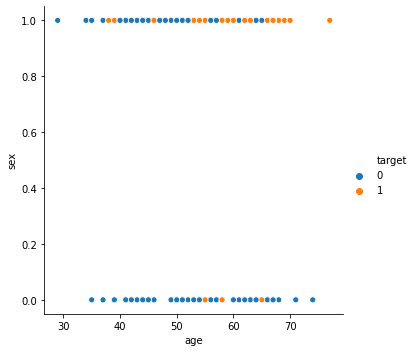

In [7]:
sns.relplot(x = 'age', y = 'sex', hue = 'target', data = train_df)

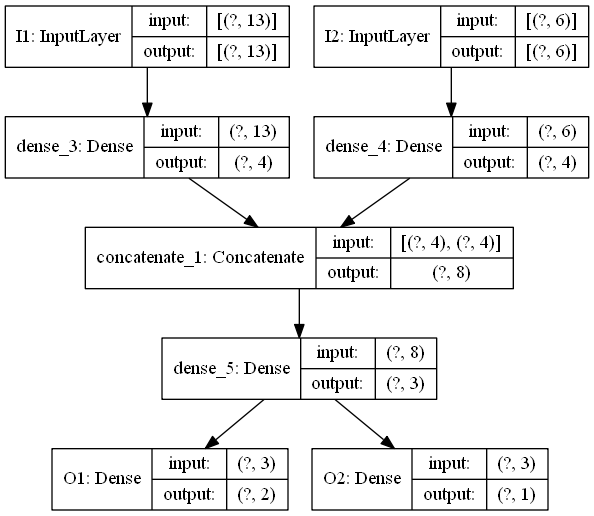

In [9]:
def create_model():
    input1 = tf.keras.Input(shape=(13,))
    hidden1 = tf.keras.layers.Dense(units = 12, activation='relu')(input1)
    hidden2 = tf.keras.layers.Dense(units = 6, activation='relu')(hidden1)
    output1 = tf.keras.layers.Dense(units = 2, activation='softmax')(hidden2)
    
    model = tf.keras.models.Model(inputs = input1, outputs = output1, name= "functional1")
    
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def create_model1():
    model = tf.keras.Sequential([
    tf.keras.Input(shape = (13,)),
    tf.keras.layers.Dense(units = 12, activation='relu'),
    tf.keras.layers.Dense(units = 6, activation='relu'),
    tf.keras.layers.Dense(units = 2, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def create_model2():
    input1 = tf.keras.Input(shape=(13,))
    hidden1 = tf.keras.layers.Dense(units = 6, activation='relu')(input1)
    hidden2 = tf.keras.layers.Dense(units = 6, activation='relu')(input1)
    merge = tf.keras.layers.concatenate([hidden1,hidden2])
    hidden3 = tf.keras.layers.Dense(units = 3, activation='relu')(merge)
    output1 = tf.keras.layers.Dense(units = 2, activation='softmax')(hidden3)
    
    model = tf.keras.models.Model(inputs = input1, outputs = output1)
    

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def create_model3():
    input1 = tf.keras.Input(shape=(13,), name = 'I1')
    input2 = tf.keras.Input(shape=(6,), name = 'I2')
    
    hidden1 = tf.keras.layers.Dense(units = 4, activation='relu')(input1)
    hidden2 = tf.keras.layers.Dense(units = 4, activation='relu')(input2)
    merge = tf.keras.layers.concatenate([hidden1, hidden2])
    hidden3 = tf.keras.layers.Dense(units = 3, activation='relu')(merge)
    output1 = tf.keras.layers.Dense(units = 2, activation='softmax', name ='O1')(hidden3)
    output2 = tf.keras.layers.Dense(units = 1, activation='linear', name = 'O2')(hidden3)
    
    model = tf.keras.models.Model(inputs = [input1,input2], outputs = [output1,output2])
    
    model.compile(optimizer='adam',
                  loss={'O1':'sparse_categorical_crossentropy','O2':'mse'},
                  metrics={'O1':['accuracy'],'O2':['mae']},
                  loss_weights=[1.0, 0.5])
    return model



model = create_model3()
tf.keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True)
# model.summary()

In [10]:
new_train_data = np.random.uniform(0,10, (192, 6))
new_train_labels = np.random.uniform(0,1, (192,))
new_val_data = np.random.uniform(0,10, (48, 6))
new_val_labels = np.random.uniform(0,1, (48,))
print(new_train_data.shape)
print(new_train_labels.shape)

(192, 6)
(192,)


In [ ]:
history = model.fit(
    x = train_data, 
    y = train_labels,
    batch_size = 192,
    epochs = 100,
    verbose = 1,
    callbacks = None,
    validation_data = (val_data, val_labels),
    shuffle = True,
    class_weight = {0:0.5, 1:10}
)

In [11]:
history = model.fit(
    x = {'I1':train_data, 'I2':new_train_data}, 
    y = {'O1':train_labels, 'O2': new_train_labels},
    batch_size = 192,
    epochs = 10,
    validation_data = ([val_data,new_val_data],[val_labels, new_val_labels])
)

Epoch 1/10
1/1 [==============================] - 0s 486ms/step - loss: 0.8794 - O1_loss: 0.6951 - O2_loss: 0.3686 - O1_accuracy: 0.7292 - O2_mae: 0.5265 - val_loss: 0.8488 - val_O1_loss: 0.6927 - val_O2_loss: 0.3122 - val_O1_accuracy: 0.7292 - val_O2_mae: 0.4793
Epoch 2/10
1/1 [==============================] - 0s 46ms/step - loss: 0.8761 - O1_loss: 0.6937 - O2_loss: 0.3647 - O1_accuracy: 0.7292 - O2_mae: 0.5242 - val_loss: 0.8479 - val_O1_loss: 0.6922 - val_O2_loss: 0.3113 - val_O1_accuracy: 0.7292 - val_O2_mae: 0.4783
Epoch 3/10
1/1 [==============================] - 0s 51ms/step - loss: 0.8736 - O1_loss: 0.6929 - O2_loss: 0.3614 - O1_accuracy: 0.7344 - O2_mae: 0.5221 - val_loss: 0.8469 - val_O1_loss: 0.6918 - val_O2_loss: 0.3103 - val_O1_accuracy: 0.7292 - val_O2_mae: 0.4773
Epoch 4/10
1/1 [==============================] - 0s 55ms/step - loss: 0.8717 - O1_loss: 0.6921 - O2_loss: 0.3592 - O1_accuracy: 0.7292 - O2_mae: 0.5205 - val_loss: 0.8460 - val_O1_loss: 0.6913 - val_O2_loss: 0

In [12]:
test_loss= model.evaluate(
    x = {'I1':train_data, 'I2':new_train_data}, 
    y = {'O1':train_labels, 'O2': new_train_labels},
    batch_size = 32,
    verbose = 1
)
test_loss

6/6 [==============================] - 0s 5ms/step - loss: 0.8643 - O1_loss: 0.6885 - O2_loss: 0.3515 - O1_accuracy: 0.7344 - O2_mae: 0.5133


[0.8642677664756775,
 0.6885148882865906,
 0.3515057861804962,
 0.734375,
 0.5132837295532227]

In [13]:
predictions_probabilities = model.predict(x = {'I1':train_data, 'I2':new_train_data})
predictions_probabilities

[array([[0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.50499415, 0.49500588],
        [0.504

In [17]:
predictions1 = tf.math.argmax(predictions_probabilities[0], 1).numpy()
predictions2 = predictions_probabilities[1]
predictions1


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)